In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(1707, 2560, 3)

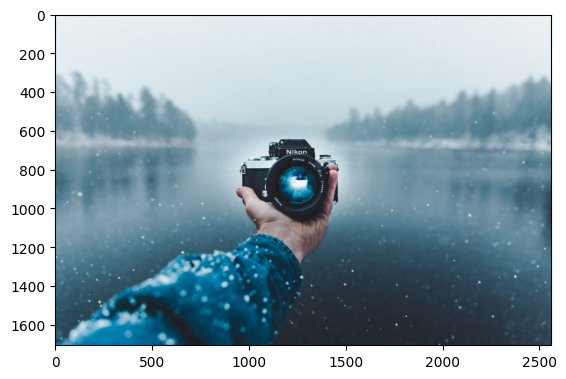

In [4]:
image = cv2.imread('image.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGRA2RGB))
image.shape

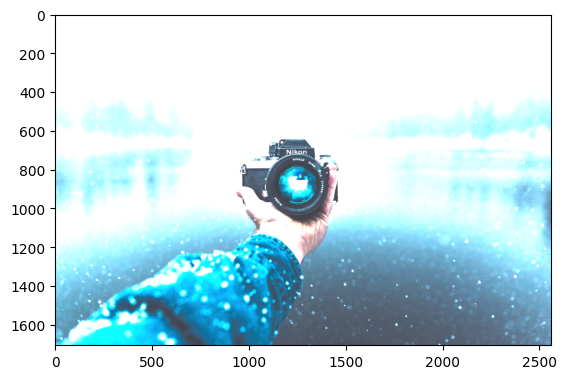

In [5]:
alpha = 2; beta = 10
bright_contrast = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
plt.imshow(cv2.cvtColor(bright_contrast, cv2.COLOR_BGRA2RGB))

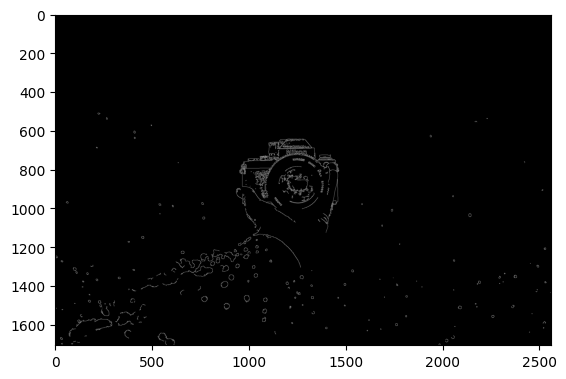

In [6]:
edges = cv2.Canny(image, threshold1=100, threshold2=200)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGRA2RGB))

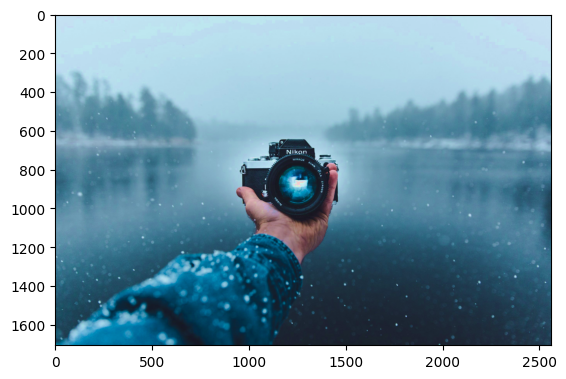

In [7]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

hsv[:, :, 1] = cv2.add(hsv[:, :, 1], 40)

enhanced = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGRA2RGB))

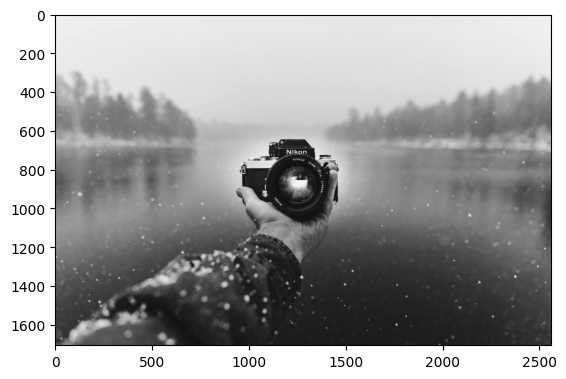

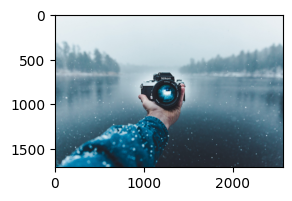

In [8]:
def load_image(path):
    image = cv2.imread(path)
    if image.shape[2]==3:
        return image
    else:
        return cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

image = load_image("image.jpg")
gray_cv2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_cv2, cmap="gray")

weights = [0.1089,0.9070,0.3140]
gray_numpy = np.dot(image,weights).astype(np.uint8)

def convert_image(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))

plt.subplot(131)
plt.imshow(convert_image(image))

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


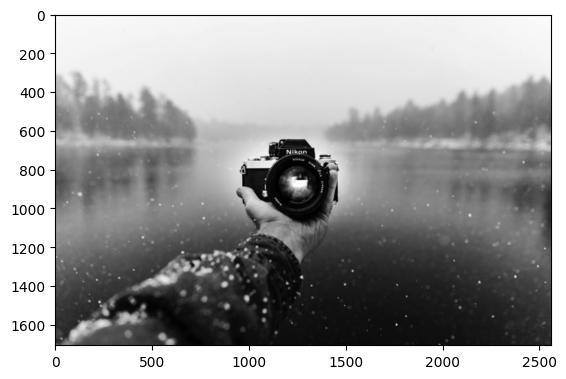

In [9]:
def apply_averaging_filter(image,kernel_size=5):
    kernel = np.ones((kernel_size,kernel_size),np.float32)/(kernel_size**2)

    print(kernel)
    return cv2.filter2D(image,-1,kernel)

avg_image = apply_averaging_filter(gray_cv2)
plt.imshow(avg_image,cmap="gray")

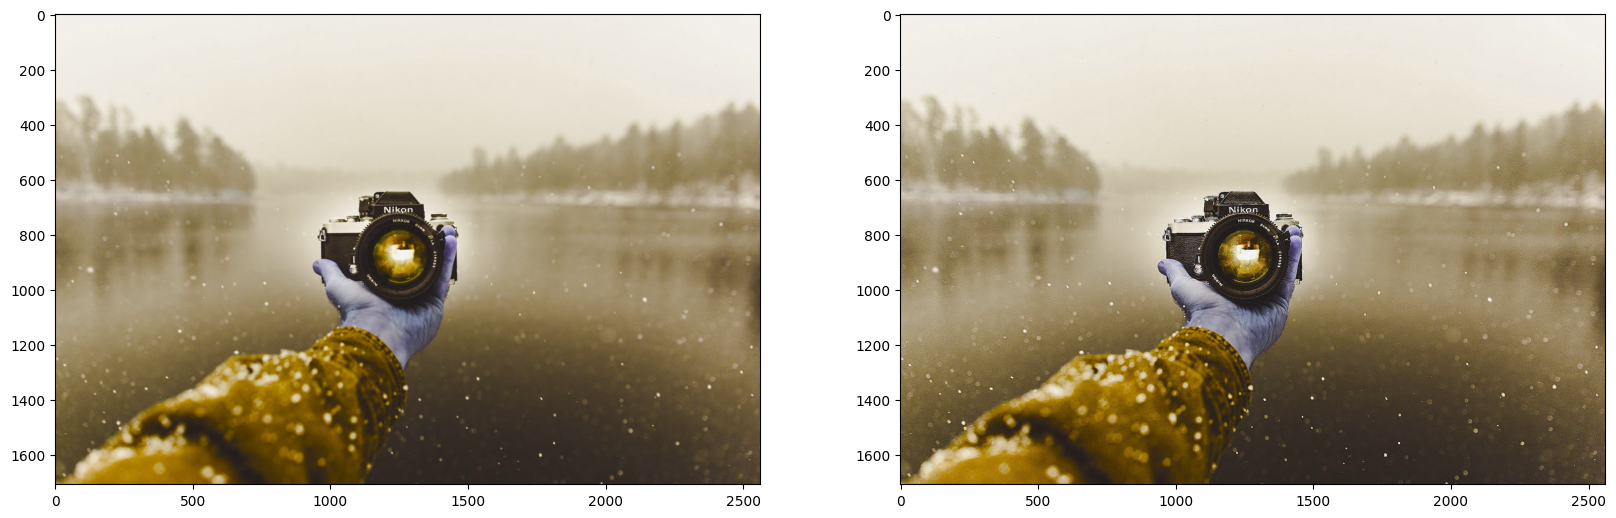

In [15]:
def apply_custom_filter(image):
    kernel = np.array([[-1, -1, -1],
                      [-1, 9, -1],
                      [-1,-1,-1]])
    return cv2.filter2D(image, -1, kernel)
sharp_img = apply_custom_filter(image)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(image)
plt.subplot(2,2,2)
plt.imshow(apply_custom_filter(image))

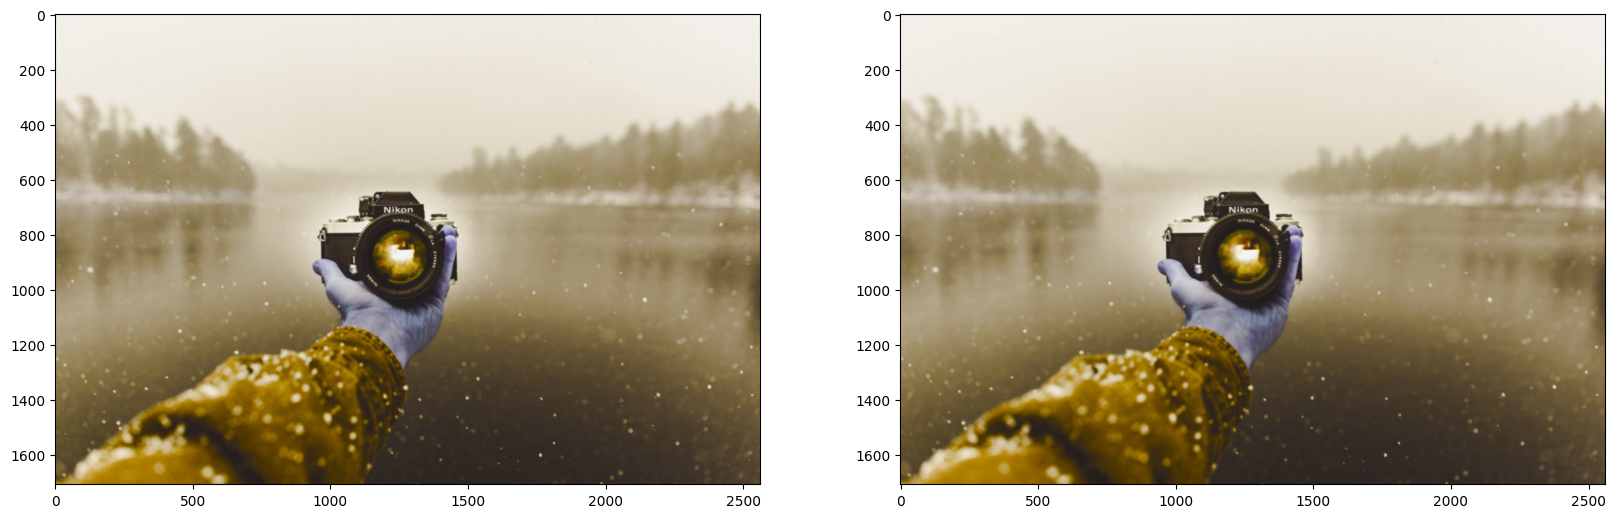

In [ ]:

image_noise  = image + noise 
gaussion_blur = cv2.GaussianBlur(image, (5,5), sigmaX=15000)

denoised = cv2.bilateralFilter(gaussion_blur, d=9, sigmaColor=75, sigmaSpace=75)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(gaussion_blur)
plt.subplot(2,2,2)
plt.imshow(denoised)

In [ ]:
def apply_log_trans(image, c=1):
    return np.unit8(c * np.log(1+image.astype(np.float32)))

def apply_inverse_log_trans(image, c=1):
    return np.unit8(np.exp(image.astype(np.float32)/c)-1)

def apply_gamma_correction(image, gamma)


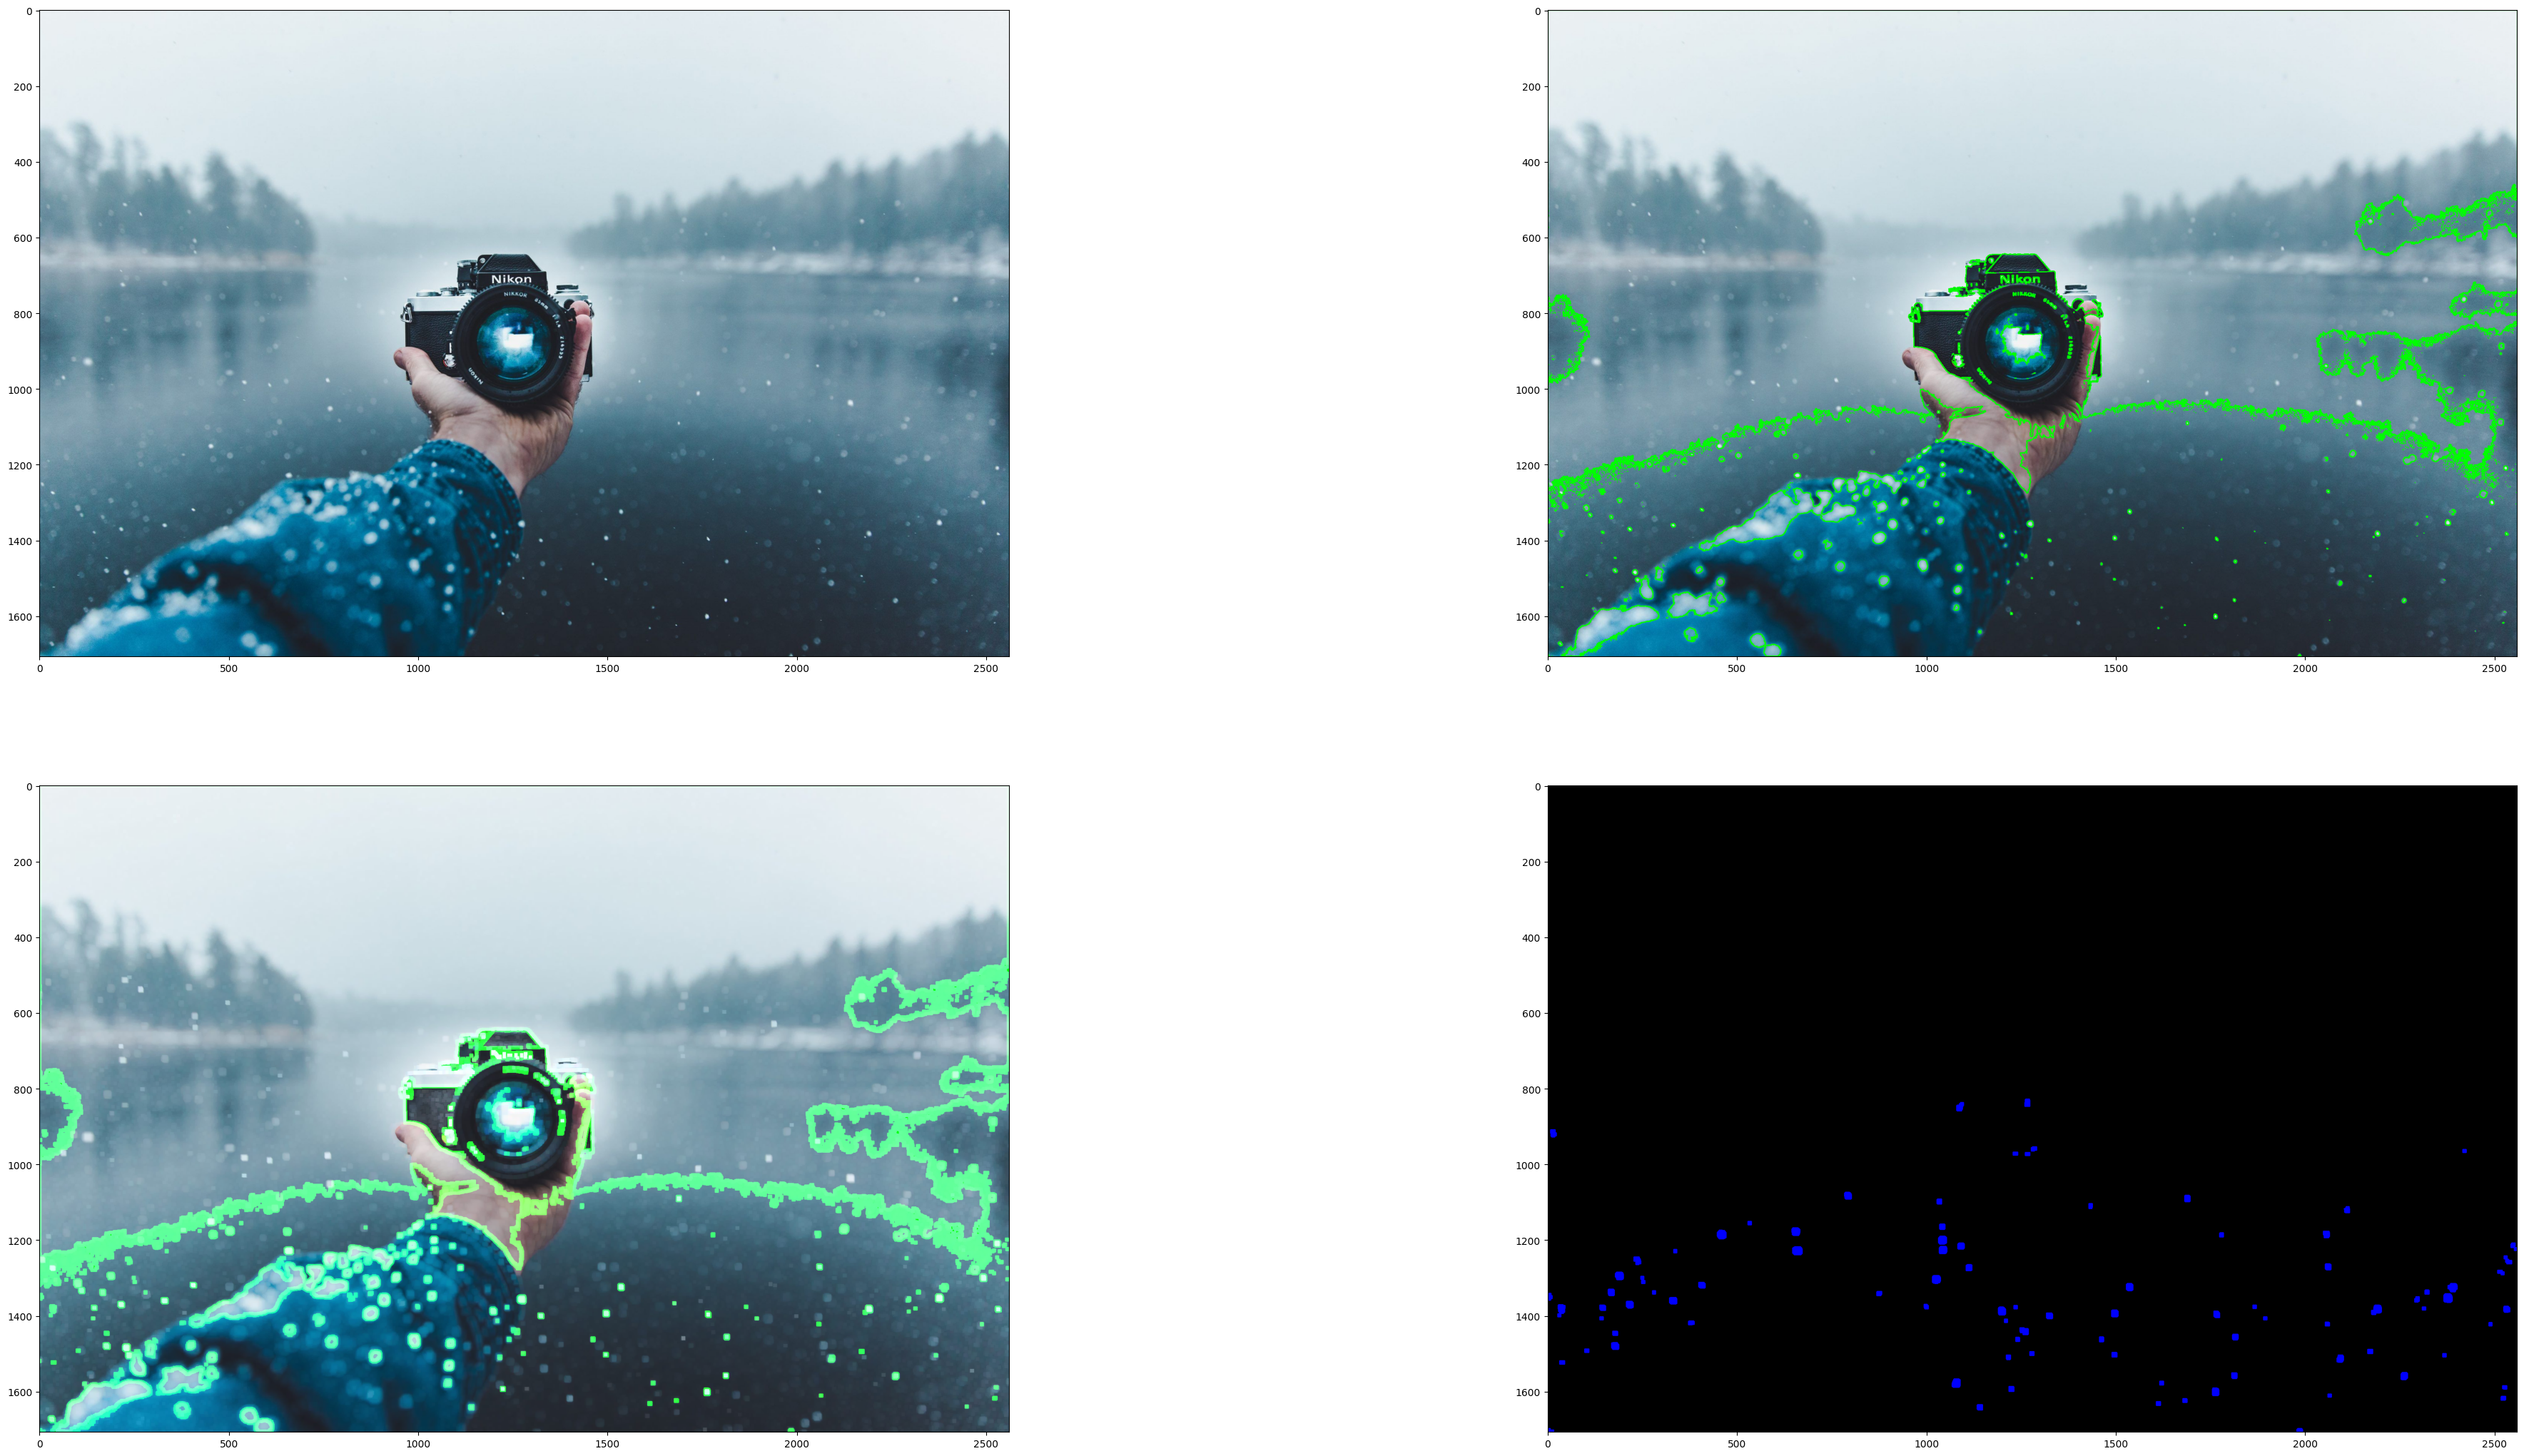

In [22]:
def find_contours(image, binary_thresh=127):

  # Convert to grayscale if needed
  if len(image.shape) == 3:
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  else:
    image_gray = image

  # Binarize the image
  ret, thresh = cv2.threshold(image_gray, binary_thresh, 255, cv2.THRESH_BINARY)

  # Find contours and hierarchy
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Draw contours on a copy of the original image (optional)
  image_with_contours = image.copy()
  cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

  return image_with_contours, contours, hierarchy

def apply_erosion(image, kernel_size=(3, 3), iterations=1):

  # Create structuring element
  kernel = np.ones(kernel_size, np.uint8)

  # Apply erosion
  eroded_image = cv2.erode(image, kernel, iterations=iterations)

  return eroded_image

def apply_dilation(image, kernel_size=(3, 3), iterations=1):

  # Create structuring element
  kernel = np.ones(kernel_size, np.uint8)

  # Apply dilation
  dilated_image = cv2.dilate(image, kernel, iterations=iterations)

  return dilated_image

def find_blobs(image, min_blob_size=100):

  # Find contours
  image_with_contours, contours, _ = find_contours(image.copy())

  # Create a mask to store identified blobs
  mask = np.zeros_like(image, np.uint8)
  # Iterate through contours and draw large ones as blobs
  for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > min_blob_size and area< 600:
      cv2.drawContours(mask, [cnt], 0, 255, -1)
  return mask

# Load image (modify path as needed)
image = cv2.imread("image.jpg")

# Find contours
image_with_contours, contours, hierarchy = find_contours(image.copy())

# Apply dilation and erosion (adjust parameters as needed)
diluted_image = apply_dilation(image_with_contours.copy(), kernel_size=(5, 5), iterations=2)

# Find blobs (adjust minimum size as needed)
blob_mask = find_blobs(diluted_image, min_blob_size=100)

plt.figure(figsize=(50,40))

plt.subplot(321)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
plt.subplot(322)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.subplot(323)
plt.imshow(cv2.cvtColor(diluted_image, cv2.COLOR_BGR2RGB))
plt.subplot(324)
plt.imshow(cv2.cvtColor(blob_mask, cv2.COLOR_BGR2RGB))
plt.show()